In [13]:
from OrbitCOM import OrbitCOM 

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [14]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
MW = OrbitCOM("MW", 0, 800, 50)
M31 = OrbitCOM("M31", 0, 800, 50)
M33 = OrbitCOM("M33", 0, 800, 50)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750


In [15]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_COM = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31_COM = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33_COM = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)


In [16]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relMagnitude(a,b): 
    """Function to compute the magnitude of the difference between two vectors. 
    Input: 
        a: 'np.array'
            vector 1
        b: 'np.array'
            vector 2
    Output: 
        magnitude of the difference between two vectors
    """
    
    if a.size == b.size : 
        rel = a - b
        mag = np.sqrt( rel[0]**2 + rel[1]**2 + rel[2]**2 )
    else: 
        raise TypeError("Two vector have different dimesions")
    
    return mag

In [17]:
a = np.array([1,2,3])
b = np.array([3,0,1])

print(relMagnitude(a,b))

3.4641016151377544


In [24]:
# Determine the magnitude of the relative position and velocities 
ind = MW_COM.size

# make empty array
separation_MW_M31 = []
relativevel_MW_M31 = []

separation_M33_M31 = []
relativevel_M33_M31 = []

for i in range(ind):
    
#   store position vectors of all galaxies
    MW_pos_vec = np.array([MW_COM[i]['x'], MW_COM[i]['y'], MW_COM[i]['z']])
    M31_pos_vec = np.array([M31_COM[i]['x'], M31_COM[i]['y'], M31_COM[i]['z']])
    M33_pos_vec = np.array([M33_COM[i]['x'], M33_COM[i]['y'], M33_COM[i]['z']])
    
#   store velocity vectors of all galaxies
    MW_vel_vec = np.array([MW_COM[i]['vx'], MW_COM[i]['vy'], MW_COM[i]['vz']])
    M31_vel_vec = np.array([M31_COM[i]['vx'], M31_COM[i]['vy'], M31_COM[i]['vz']])
    M33_vel_vec = np.array([M33_COM[i]['vx'], M33_COM[i]['vy'], MW_COM[i]['vz']])
    
    
# of MW and M31
   
    separation_MW_M31.append( relMagnitude( MW_pos_vec , M31_pos_vec) ) 
    relativevel_MW_M31.append( relMagnitude( MW_vel_vec, M31_vel_vec) ) 
    
# of M33 and M31

    separation_M33_M31.append(  relMagnitude( M33_pos_vec, M31_pos_vec)  ) 
    relativevel_M33_M31.append( relMagnitude( M33_vel_vec, M31_vel_vec)  ) 
    print(MW_COM[i]['t'])

IndexError: index 16 is out of bounds for axis 0 with size 16

In [22]:
print([MW_COM[i]['x'], MW_COM[i]['y'], MW_COM[i]['z']])

[-2.16, 3.41, -1.58]


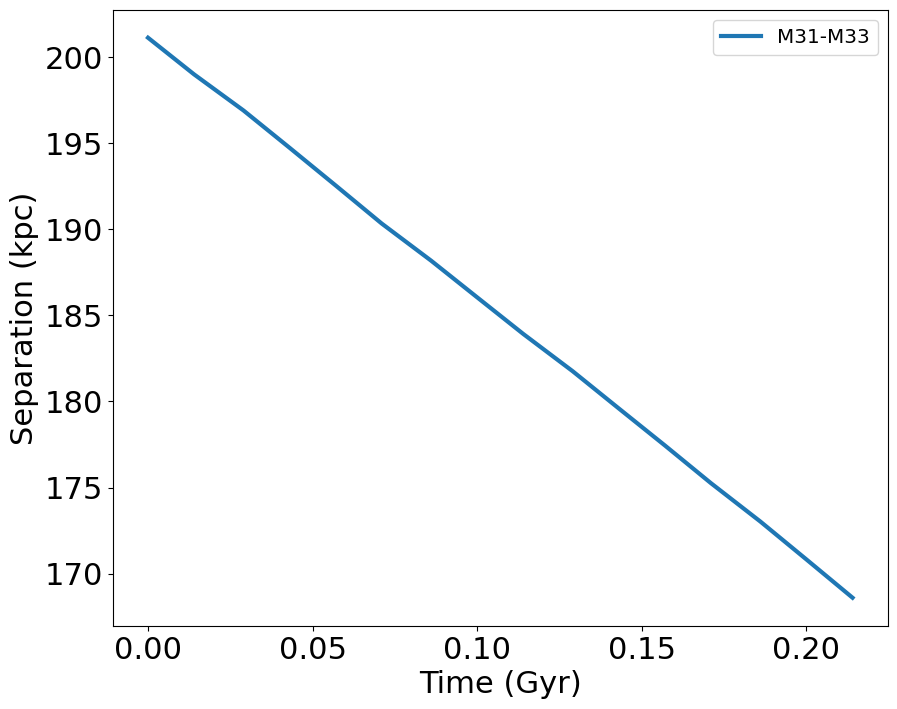

In [23]:
# Plot the Orbit of the galaxies 
#################################
time = MW_COM['t']

fig,ax = plt.subplots(figsize=(10,8))


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot z = 0
plt.plot(time, separation_M33_M31,
         linewidth = 3, label='M31-M33')

# Axes labels 
plt.xlabel('Time (Gyr)',fontsize=22) 
plt.ylabel('Separation (kpc)', fontsize=22)

# Legend
plt.legend(loc='upper right',fontsize='x-large')

# save the file 
# plt.savefig('AbundanceMatching_Lab5.png')



In [ ]:
# Plot the orbital velocities of the galaxies 
#################################
